<a href="https://colab.research.google.com/github/Sonarajan04/regression_projects/blob/main/SLR%26POLY_socr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/datasets/SOCR-HeightWeight.csv')
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [3]:
df.isna().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [4]:
df.dtypes

Index               int64
Height(Inches)    float64
Weight(Pounds)    float64
dtype: object

In [5]:
df.drop(['Index'],axis=1,inplace=True)
df

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


In [6]:
X=df.iloc[:,:-1]
X

,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781
...,...
24995,69.50215
24996,64.54826
24997,64.69855
24998,67.52918


In [7]:
y=df.iloc[:,-1]
y

0        112.9925
1        136.4873
2        153.0269
3        142.3354
4        144.2971
           ...   
24995    118.0312
24996    120.1932
24997    118.2655
24998    132.2682
24999    124.8742
Name: Weight(Pounds), Length: 25000, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.3)

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=lr.predict(X_test)
y_pred

array([128.93092219, 113.62673711, 130.99482155, ..., 118.43942347,
       122.38579848, 126.50383561])

In [11]:
y_test.values

array([123.4007, 117.4774, 127.5132, ..., 127.7629, 114.5867, 142.3762])

In [12]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('r2_score=',r2_score(y_test,y_pred))

r2_score= 0.24893656937221387


In [13]:
print('MAE=',mean_absolute_error(y_test,y_pred))

MAE= 8.13265899776529


In [14]:
print('MSE=',mean_squared_error(y_test,y_pred))

MSE= 104.1576880447908


In [15]:
import numpy as np

In [16]:
print('RMSE=',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE= 10.205767391273955


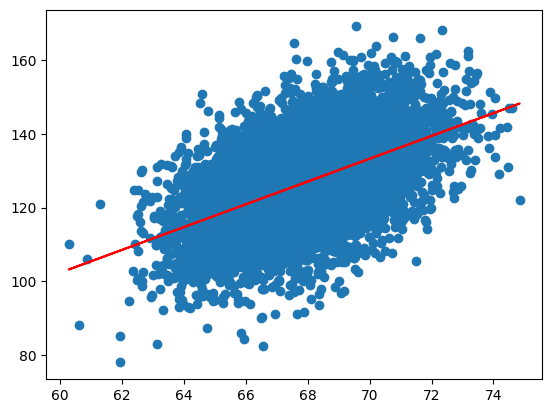

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,c='red')
plt.show()

In [18]:
#polynomial regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
X_poly=poly.fit_transform(X)
X_poly

array([[1.00000000e+00, 6.57833100e+01, 4.32744387e+03, 2.84673582e+05,
        1.87267705e+07],
       [1.00000000e+00, 7.15152100e+01, 5.11442526e+03, 3.65759197e+05,
        2.61573458e+07],
       [1.00000000e+00, 6.93987400e+01, 4.81618511e+03, 3.34237178e+05,
        2.31956390e+07],
       ...,
       [1.00000000e+00, 6.46985500e+01, 4.18590237e+03, 2.70821814e+05,
        1.75217787e+07],
       [1.00000000e+00, 6.75291800e+01, 4.56019015e+03, 3.07945902e+05,
        2.07953342e+07],
       [1.00000000e+00, 6.88776100e+01, 4.74412516e+03, 3.26764003e+05,
        2.25067235e+07]])

In [20]:
X_poly.shape

(25000, 5)

In [21]:
X_poly_train,X_poly_test,y_train,y_test=train_test_split(X_poly,y,random_state=3,test_size=0.3)

In [22]:
lr_poly=LinearRegression()
lr_poly.fit(X_poly_train,y_train)

LinearRegression()

In [23]:
y_pred_poly=lr_poly.predict(X_poly_test)
y_pred_poly

array([128.10551317, 127.064687  , 130.65886024, ..., 119.4530263 ,
       127.30615153, 124.88230551])

In [24]:
y_test.shape

(7500,)

In [25]:
y_pred_poly.shape

(7500,)

In [26]:
print('r2_score=',r2_score(y_test,y_pred_poly))

r2_score= 0.2501673425576426


In [27]:
print('mae=',mean_absolute_error(y_test,y_pred_poly))

mae= 8.124406947140786
